<a href="https://colab.research.google.com/github/GauravBhogate/oasis_intern/blob/main/Sales_prediction_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pds
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

data=files.upload()


Saving Advertising.csv to Advertising.csv


In [3]:
df=pds.read_csv('Advertising.csv')
df


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [6]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

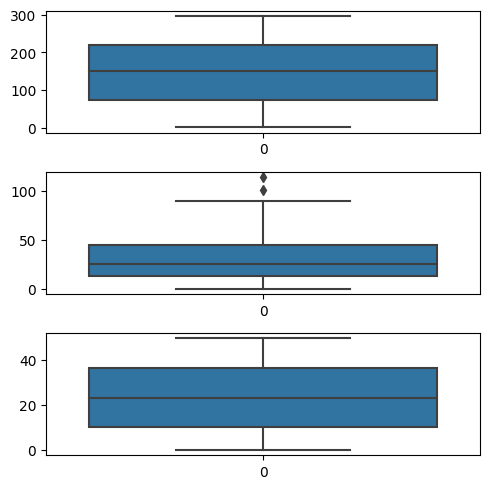

In [10]:
fig, axs =plt.subplots(3, figsize = (5,5))
plt1 =sns.boxplot(df['TV'], ax = axs[0])
plt2 =sns.boxplot (df['Newspaper'], ax = axs[1])
plt3 =sns.boxplot (df['Radio'], ax = axs[2])
plt.tight_layout()

<ipython-input-11-6fe4fcc6000a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

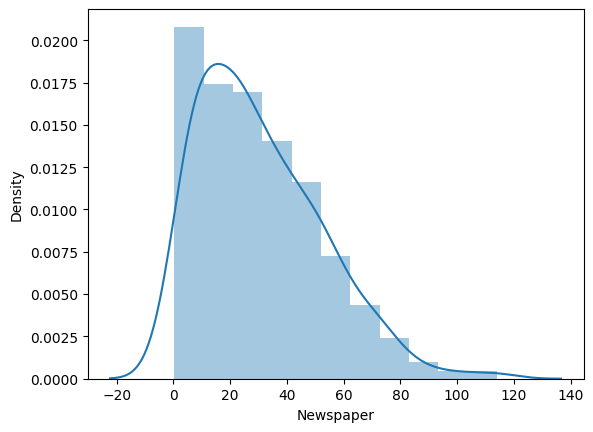

In [11]:
sns.distplot(df['Newspaper'])

In [12]:
iqr=df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [13]:
lower_bridge = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge = df['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)


-35.775000000000006
93.625


In [14]:
data =df.copy()

In [15]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<Axes: >

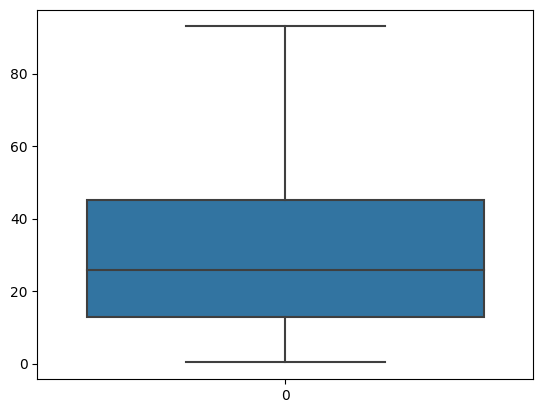

In [16]:
sns.boxplot(data['Newspaper'])

<Axes: >

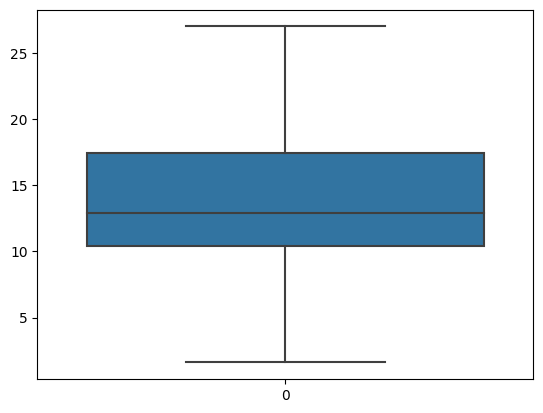

In [17]:
sns.boxplot(data['Sales'])

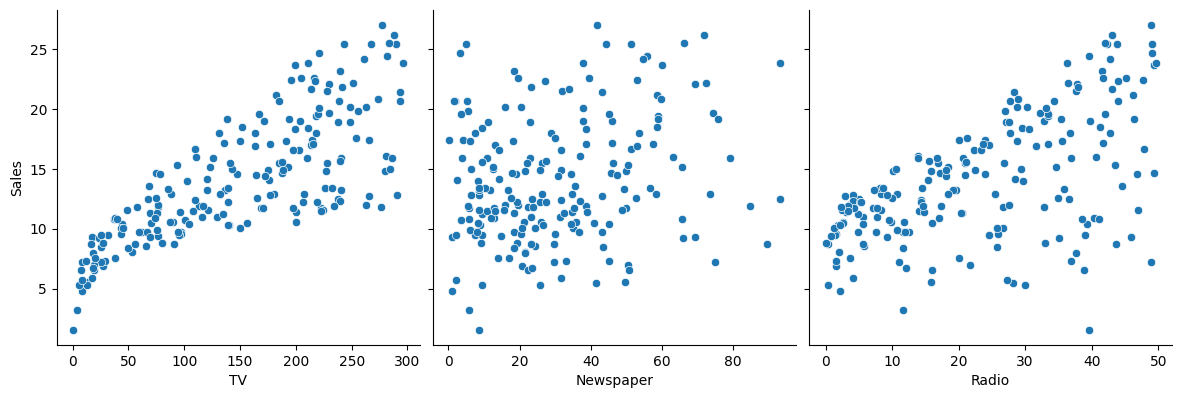

In [18]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],
             y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

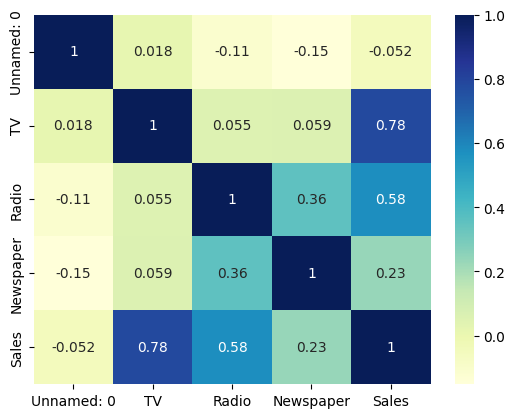

In [19]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()


In [21]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5) |(df.corr()['Sales']<-0.5)].index)

In [22]:
print(important_features)

['TV', 'Radio', 'Sales']


In [23]:
x=data['TV']
y=data['Sales']

In [24]:
x=x.values.reshape(-1,1)

In [25]:
x


array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [26]:
y


0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [27]:
print(x.shape,y.shape)

(200, 1) (200,)


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [29]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [30]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [31]:
knn =KNeighborsRegressor().fit(x_train, y_train)

knn

KNeighborsRegressor()

In [32]:
knn_train_pred= knn.predict(x_train)

In [33]:
knn_test_pred=knn.predict(x_test)

In [34]:
print(knn_train_pred,knn_test_pred)

[14.8  13.3  12.38 12.7  12.7  10.52 19.86  9.66 13.54 14.8  19.46 16.34
 21.92 18.1  17.1   5.74  7.44 11.3  10.5  11.32 17.1  11.32 18.72 15.1
 19.56 15.2  18.92  5.74  7.44  7.44 12.96  7.44  7.94 21.92 17.   18.92
 15.2   5.74 15.22 12.38 18.34 15.1  17.1  11.52 12.44 18.2  16.34 15.1
 17.4  19.74 16.36 12.78 18.1  18.72 15.48 11.42  7.94 20.18 18.92 17.16
 19.86 18.2  17.48 13.92 12.96 16.02 14.14 11.52  7.36  8.66 19.3  18.82
 13.36 17.1  18.26 13.38  7.04 16.52 12.54  9.84 16.62 11.6  17.16 12.38
 15.22 16.26 19.46 14.56 20.44 19.74 12.96 17.   17.06 19.56  9.7  11.6
 11.06 17.02 10.5  17.48 20.44 14.8   7.44 20.86 16.62 20.86 18.72 14.84
 11.52 18.2  15.06 16.34  9.84 14.68 13.76 20.16 15.1  17.84 15.2  21.92
 10.08 20.16  7.94 17.4  14.68 11.52 12.54 11.3  20.54 12.3  18.1   5.74
 10.76 14.68] [14.68 12.96  5.74 11.52 12.44  9.7   7.04 11.28 15.2   6.42 15.2  13.36
 14.68 12.7  11.52 11.46  7.44 13.94 11.6  18.92 16.02  7.36 17.72 16.62
 16.34 18.92 14.6  19.56 15.12 11.32 18.

In [35]:
Results = pds.DataFrame(columns=["Model","Train R2","Test R2", "Test RMSE", "Variance"])

In [36]:
r2=r2_score(y_test,knn_test_pred)
r2_train =r2_score(y_train,knn_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance=r2_train -r2
Results =Results.append({"model":"k-Nearest Neighbours","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.638312130345877
RMSE: 3.098526531541511


<ipython-input-36-2fb52bf6c5bb>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results =Results.append({"model":"k-Nearest Neighbours","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)


In [37]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance,model
0,NaN,0.621896,0.638312,3.098527,-0.016416,k-Nearest Neighbours


In [38]:
import statsmodels.api as sm

In [39]:
x_train_constant =sm.add_constant(x_train)

In [40]:
model = sm.OLS(y_train,x_train_constant).fit()


In [41]:
model.params

const    7.491219
x1       0.045581
dtype: float64

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     173.6
Date:                Sat, 22 Jul 2023   Prob (F-statistic):           7.89e-26
Time:                        11:58:25   Log-Likelihood:                -352.90
No. Observations:                 134   AIC:                             709.8
Df Residuals:                     132   BIC:                             715.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4912      0.615     12.177      0.000       6.274       8.708
x1             0.0456      0.003     13.177      0.000       0.039       0.052
==============================================================================
Omnibus:                        0.647   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.724   Jarque-Bera (JB):                0.761
Skew:                          -0.071   Prob(JB):                        0.684
Kurtosis:                       2.659   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

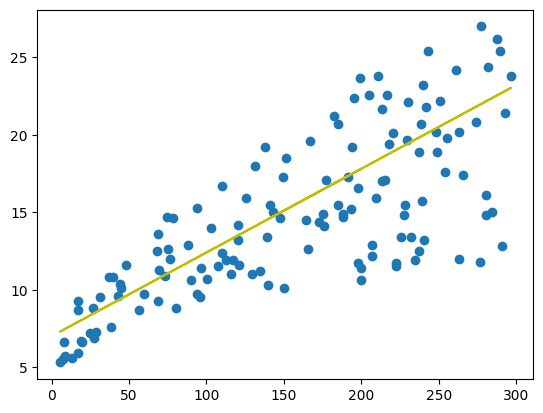

In [43]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9955+0.0541* x_train, 'y')
plt.show()

In [44]:
y_train_pred = model.predict(x_train_constant)
res=(y_train, y_train_pred)
res

(50     11.4
 94     11.5
 164    11.9
 89     16.7
 71     12.4
        ... 
 140    10.9
 175    27.0
 132     5.7
 129     9.7
 67     13.4
 Name: Sales, Length: 134, dtype: float64,
 array([16.59821866, 12.38657302, 12.83326271, 12.49596642, 12.49596642,
        10.0528473 , 18.50804499,  9.17314209, 13.38934579, 16.55719614,
        20.31759404, 15.49972667, 21.00130275, 19.96662357, 17.84712657,
         7.73735381,  8.27520466, 11.78490936,  9.51955451, 11.87607052,
        17.97931026, 11.85328023, 19.40142437, 14.31463158, 17.3548563 ,
        15.03936281, 19.59742086,  7.82395691,  8.27520466,  8.37548193,
        10.96901697,  8.26153048,  8.71277823, 20.74149344, 16.49794139,
        18.42599994, 15.09405951,  7.8467472 , 17.62833979, 12.97000445,
        18.3986516 , 14.20523819, 17.89726521, 10.64539485, 12.77856602,
        18.34851296, 15.47237833, 14.31918964, 15.91906801, 19.05957001,
        17.04490835, 12.63726622, 20.10336531, 19.46523718, 18.17986481,
        12.

In [45]:
y_train_pred

array([16.59821866, 12.38657302, 12.83326271, 12.49596642, 12.49596642,
       10.0528473 , 18.50804499,  9.17314209, 13.38934579, 16.55719614,
       20.31759404, 15.49972667, 21.00130275, 19.96662357, 17.84712657,
        7.73735381,  8.27520466, 11.78490936,  9.51955451, 11.87607052,
       17.97931026, 11.85328023, 19.40142437, 14.31463158, 17.3548563 ,
       15.03936281, 19.59742086,  7.82395691,  8.27520466,  8.37548193,
       10.96901697,  8.26153048,  8.71277823, 20.74149344, 16.49794139,
       18.42599994, 15.09405951,  7.8467472 , 17.62833979, 12.97000445,
       18.3986516 , 14.20523819, 17.89726521, 10.64539485, 12.77856602,
       18.34851296, 15.47237833, 14.31918964, 15.91906801, 19.05957001,
       17.04490835, 12.63726622, 20.10336531, 19.46523718, 18.17986481,
       12.17234429,  8.74468464, 17.41411106, 18.43511606, 16.29738683,
       18.57641586, 18.31204849, 16.91728273, 13.77678073, 10.89608804,
       15.35386882, 13.22069765, 10.63627873,  8.63073319,  8.92

<ipython-input-49-d38c02d671ce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


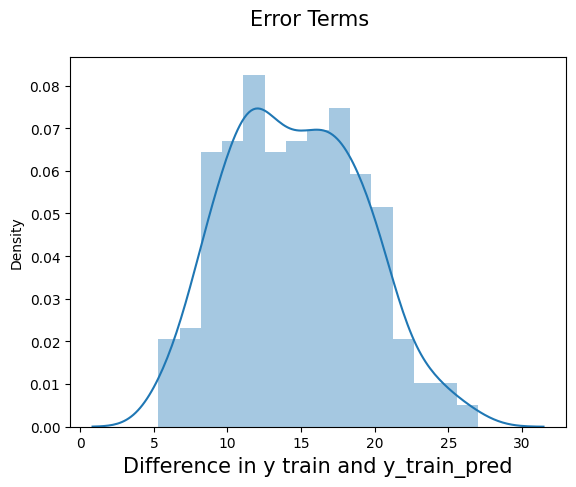

In [49]:
fig =plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y train and y_train_pred', fontsize = 15)
plt.show()

In [50]:
x_test_constant =sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [51]:
y_pred

array([13.83603548, 10.9325525 ,  7.67809905, 10.54055951, 11.39747442,
        9.45574169,  8.08832428, 10.50409505, 14.94364359,  8.02451146,
       15.16698844, 13.10218814, 13.88617412, 12.53698894, 10.70920766,
       11.4658453 ,  8.30711106, 16.79421516, 11.61170315, 19.57918863,
       15.29917212,  8.57603649, 15.73218763, 16.0512517 , 15.55898143,
       18.42144189, 14.62913759, 17.37308853, 15.24903348, 11.93532528,
       17.44601746, 17.70126871, 13.65371316,  7.88776972, 20.52726471,
       16.56631226,  8.38459805,  7.88321166, 17.27736931,  8.34813359,
        8.65808153, 13.69929374, 10.97357503,  9.92977973,  9.7702477 ,
       10.92343639, 14.93452747, 19.65667562, 17.53262057, 17.45057552,
       20.87367712, 17.50983028, 13.49418113, 10.97357503, 17.88359104,
       10.33088884, 17.09504699,  7.52312508, 18.43511606, 10.11210205,
        8.63529124,  9.22328073, 20.41787131, 11.9216511 , 12.2589474 ,
       16.72128623])

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [54]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.9974196066904377

In [55]:
r2 =r2_score(y_test,y_pred)
r2

0.6615312381445109

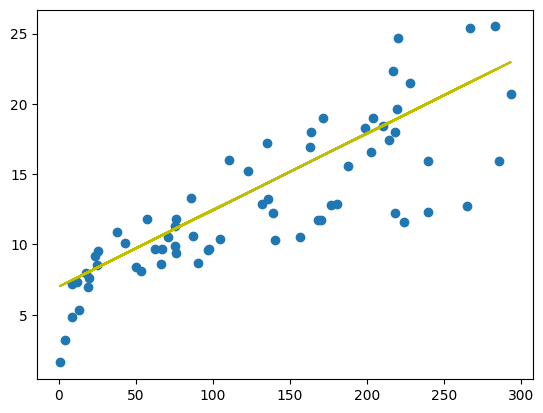

In [56]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955+0.05441 * x_test,'y')
plt.show()